In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import *
warnings.filterwarnings("ignore")

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("✅ Dataset Loaded Successfully")

/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques/data_description.txt
/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques/train.csv
/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques/sample_submission.csv
/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques/test.csv
✅ Dataset Loaded Successfully


In [5]:
train = pd.read_csv('/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Prodigy infotech/house-prices-advanced-regression-techniques/test.csv')
print("Data reading successfull")

Data reading successfull


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
rename_dict = {
    'Id': 'Id',
    'MSSubClass': 'BinaSınıfı',
    'MSZoning': 'İmarDurumu',
    'LotFrontage': 'ArsaCephe',
    'LotArea': 'ArsaAlanı',
    'Street': 'CaddeTipi',
    'Alley': 'ArkaYol',
    'LotShape': 'ArsaŞekli',
    'LandContour': 'AraziYüzeyi',
    'Utilities': 'Altyapı',
    'LotConfig': 'ArsaKonfigürasyonu',
    'LandSlope': 'AraziEğimi',
    'Neighborhood': 'Mahalle',
    'Condition1': 'BirincilYolDurumu',
    'Condition2': 'İkincilYolDurumu',
    'BldgType': 'BinaTipi',
    'HouseStyle': 'EvStili',
    'OverallQual': 'GenelKalite',
    'OverallCond': 'GenelDurum',
    'YearBuilt': 'YapımYılı',
    'YearRemodAdd': 'TadilatYılı',
    'RoofStyle': 'ÇatıStili',
    'RoofMatl': 'ÇatıMalzemesi',
    'Exterior1st': 'DışKaplama1',
    'Exterior2nd': 'DışKaplama2',
    'MasVnrType': 'TaşKaplamaTipi',
    'MasVnrArea': 'TaşKaplamaAlanı',
    'ExterQual': 'DışKalite',
    'ExterCond': 'DışDurum',
    'Foundation': 'Temel',
    'BsmtQual': 'BodrumKalite',
    'BsmtCond': 'BodrumDurum',
    'BsmtExposure': 'BodrumIşık',
    'BsmtFinType1': 'BodrumTip1',
    'BsmtFinSF1': 'BodrumAlan1',
    'BsmtFinType2': 'BodrumTip2',
    'BsmtFinSF2': 'BodrumAlan2',
    'BsmtUnfSF': 'BitmemişBodrumAlanı',
    'TotalBsmtSF': 'ToplamBodrumAlanı',
    'Heating': 'Isıtma',
    'HeatingQC': 'IsıtmaKalite',
    'CentralAir': 'MerkeziKlima',
    'Electrical': 'Elektrik',
    '1stFlrSF': 'BirinciKatAlan',
    '2ndFlrSF': 'İkinciKatAlan',
    'LowQualFinSF': 'DüşükKaliteAlan',
    'GrLivArea': 'YaşanabilirAlan',
    'BsmtFullBath': 'BodrumTamBanyo',
    'BsmtHalfBath': 'BodrumYarımBanyo',
    'FullBath': 'TamBanyo',
    'HalfBath': 'YarımBanyo',
    'BedroomAbvGr': 'YatakOdası',
    'KitchenAbvGr': 'MutfakSayısı',
    'KitchenQual': 'MutfakKalitesi',
    'TotRmsAbvGrd': 'ToplamOdaSayısı',
    'Functional': 'Fonksiyonel',
    'Fireplaces': 'ŞömineSayısı',
    'FireplaceQu': 'ŞömineKalitesi',
    'GarageType': 'GarajTipi',
    'GarageYrBlt': 'GarajYılı',
    'GarageFinish': 'GarajİçKaplama',
    'GarageCars': 'GarajArabaSayısı',
    'GarageArea': 'GarajAlanı',
    'GarageQual': 'GarajKalite',
    'GarageCond': 'GarajDurum',
    'PavedDrive': 'PeyzajYolu',
    'WoodDeckSF': 'AhşapTerasAlanı',
    'OpenPorchSF': 'AçıkVerandaAlanı',
    'EnclosedPorch': 'KapalıVerandaAlanı',
    '3SsnPorch': 'ÜçMevsimVerandaAlanı',
    'ScreenPorch': 'SineklikVerandaAlanı',
    'PoolArea': 'HavuzAlanı',
    'PoolQC': 'HavuzKalite',
    'Fence': 'Çit',
    'MiscFeature': 'EkstraÖzellik',
    'MiscVal': 'EkstraDeğer',
    'MoSold': 'SatışAyı',
    'YrSold': 'SatışYılı',
    'SaleType': 'SatışTipi',
    'SaleCondition': 'SatışDurumu',
    'SalePrice': 'SatışFiyatı'
}

train.rename(columns=rename_dict, inplace=True)
test.rename(columns=rename_dict, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   BinaSınıfı            1460 non-null   int64  
 2   İmarDurumu            1460 non-null   object 
 3   ArsaCephe             1201 non-null   float64
 4   ArsaAlanı             1460 non-null   int64  
 5   CaddeTipi             1460 non-null   object 
 6   ArkaYol               91 non-null     object 
 7   ArsaŞekli             1460 non-null   object 
 8   AraziYüzeyi           1460 non-null   object 
 9   Altyapı               1460 non-null   object 
 10  ArsaKonfigürasyonu    1460 non-null   object 
 11  AraziEğimi            1460 non-null   object 
 12  Mahalle               1460 non-null   object 
 13  BirincilYolDurumu     1460 non-null   object 
 14  İkincilYolDurumu      1460 non-null   object 
 15  BinaTipi             

In [9]:
train.describe()

,Id,BinaSınıfı,ArsaCephe,ArsaAlanı,GenelKalite,GenelDurum,YapımYılı,TadilatYılı,TaşKaplamaAlanı,BodrumAlan1,...,AhşapTerasAlanı,AçıkVerandaAlanı,KapalıVerandaAlanı,ÜçMevsimVerandaAlanı,SineklikVerandaAlanı,HavuzAlanı,EkstraDeğer,SatışAyı,SatışYılı,SatışFiyatı
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


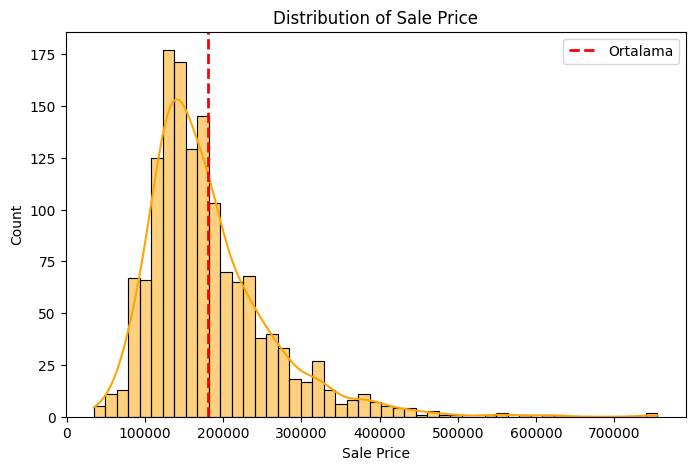

In [10]:
plt.figure(figsize=(8, 5))

sns.histplot(train['SatışFiyatı'], kde=True, color='orange')

plt.axvline(x=train['SatışFiyatı'].mean(), color='red', linestyle='--', linewidth=2, label='Ortalama')

plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.legend()
plt.show()

In [11]:
print("Skewness: %f" % train['SatışFiyatı'].skew())

Skewness: 1.882876


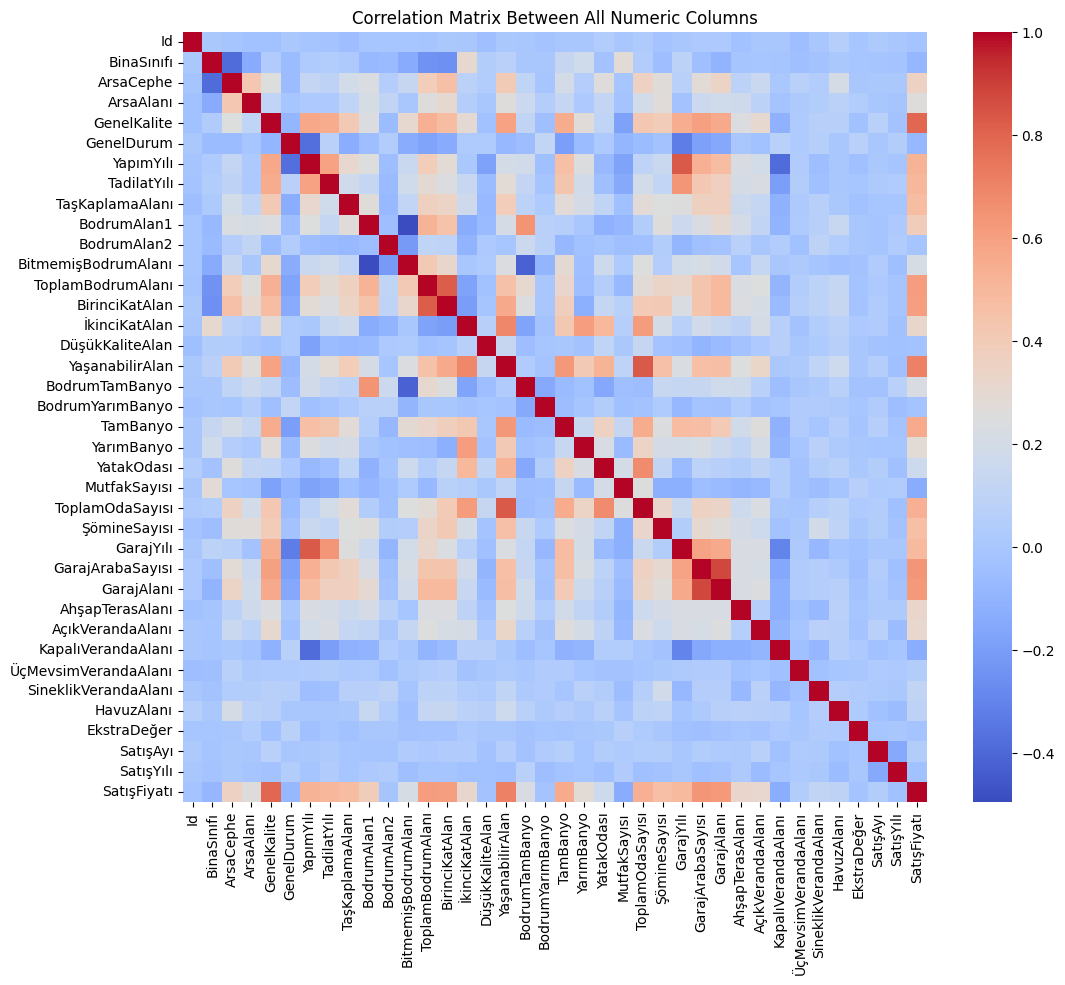

In [12]:
corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix Between All Numeric Columns")
plt.show()

In [24]:
numeric = train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric.corr()


top_corr = corr_matrix['SatışFiyatı'].sort_values(ascending=False)[1:11]

print(top_corr)

GenelKalite          0.790982
YaşanabilirAlan      0.708624
GarajArabaSayısı     0.640409
GarajAlanı           0.623431
ToplamBodrumAlanı    0.613581
BirinciKatAlan       0.605852
TamBanyo             0.560664
ToplamOdaSayısı      0.533723
YapımYılı            0.522897
TadilatYılı          0.507101
Name: SatışFiyatı, dtype: float64


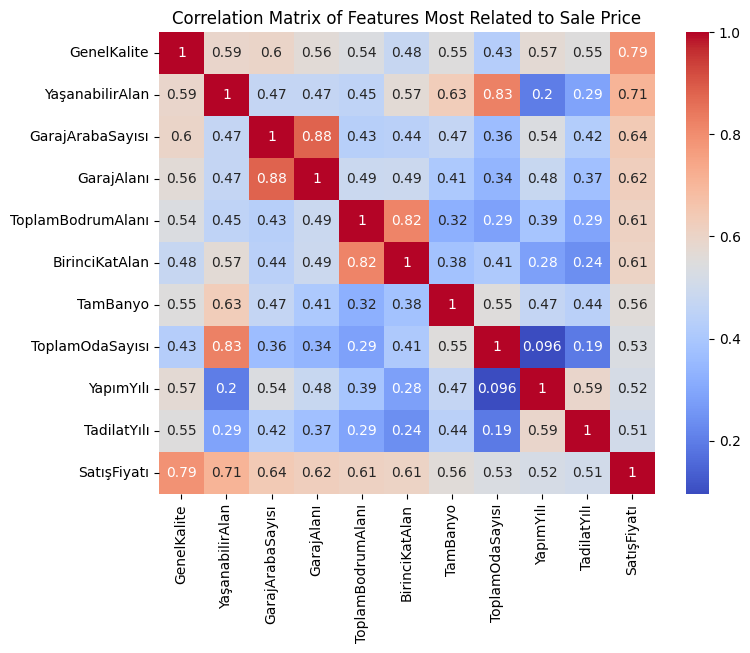

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric[top_corr.index.tolist() + ['SatışFiyatı']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features Most Related to Sale Price')
plt.show()

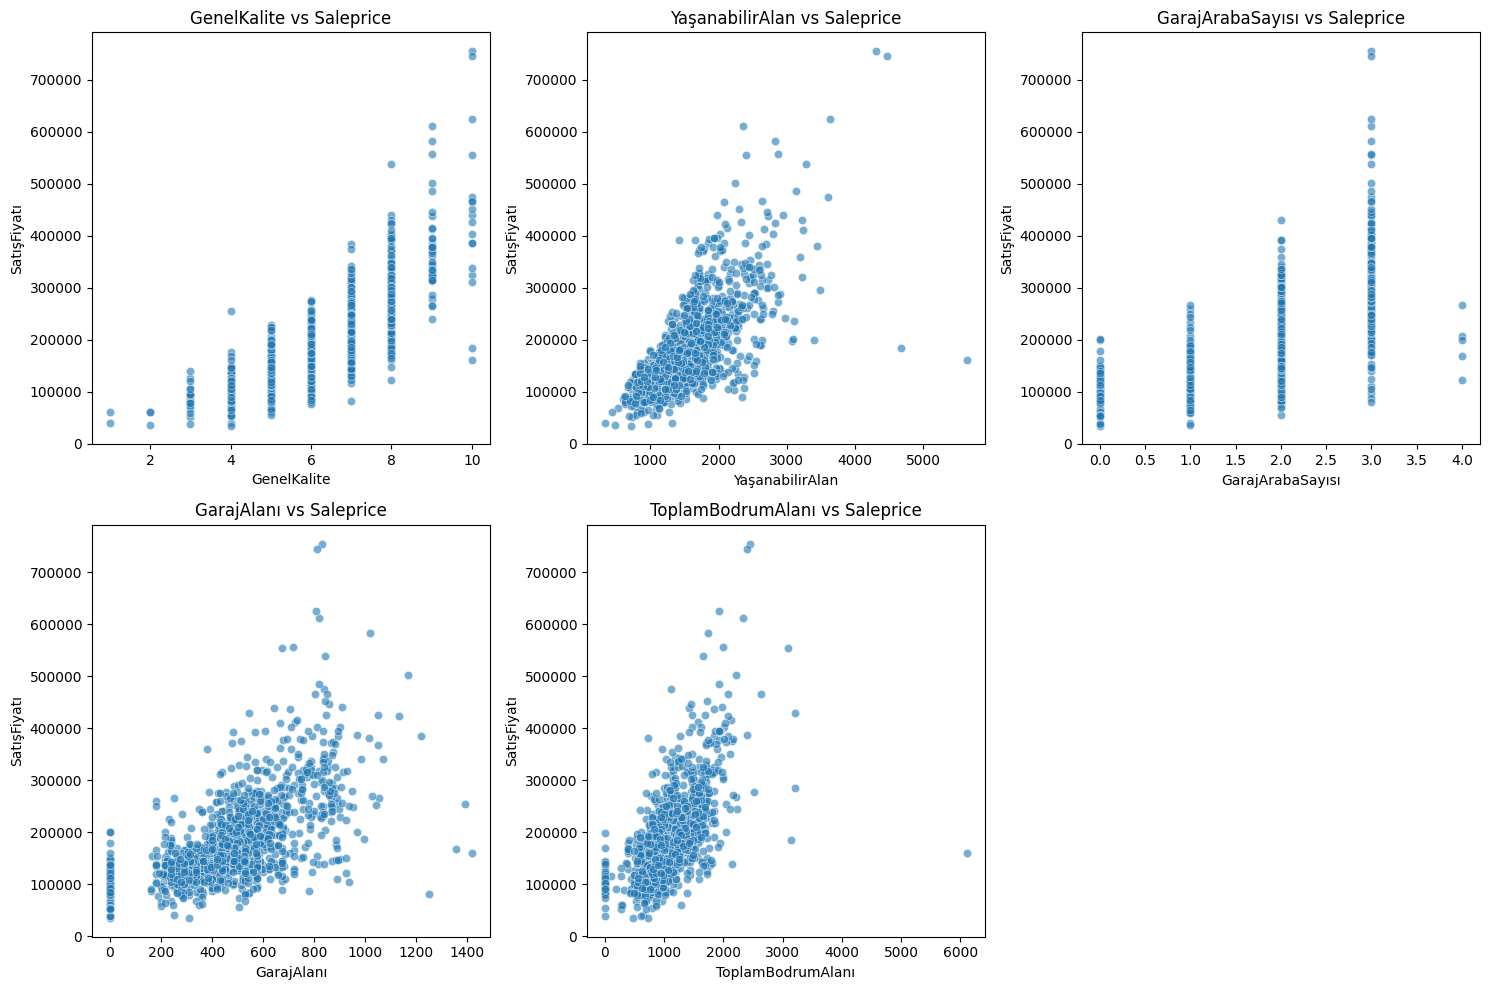

In [33]:
top_features = ['GenelKalite', 'YaşanabilirAlan', 'GarajArabaSayısı', 'GarajAlanı', 'ToplamBodrumAlanı']

# Scatterplot çizelim
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=train, x=col, y='SatışFiyatı', alpha=0.6)
    plt.title(f'{col} vs Saleprice')

plt.tight_layout()
plt.show()

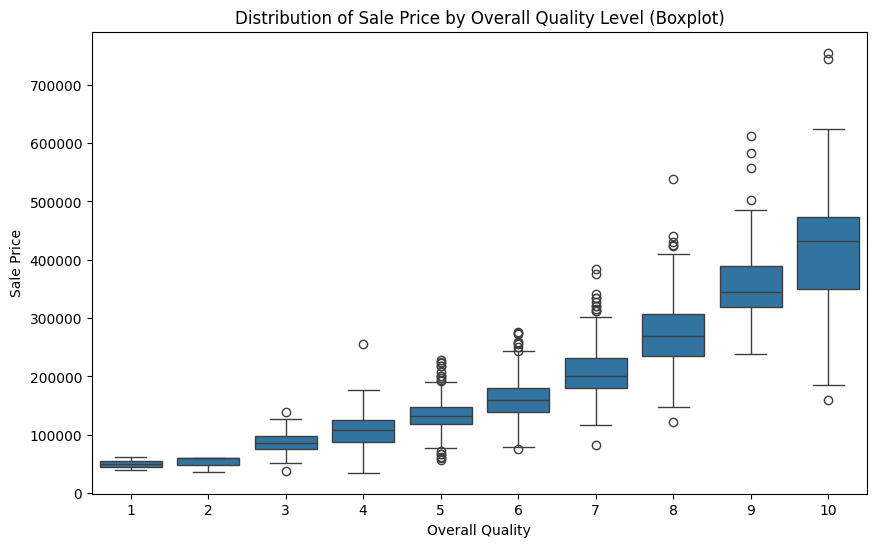

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenelKalite', y='SatışFiyatı', data=train)
plt.title('Distribution of Sale Price by Overall Quality Level (Boxplot)')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

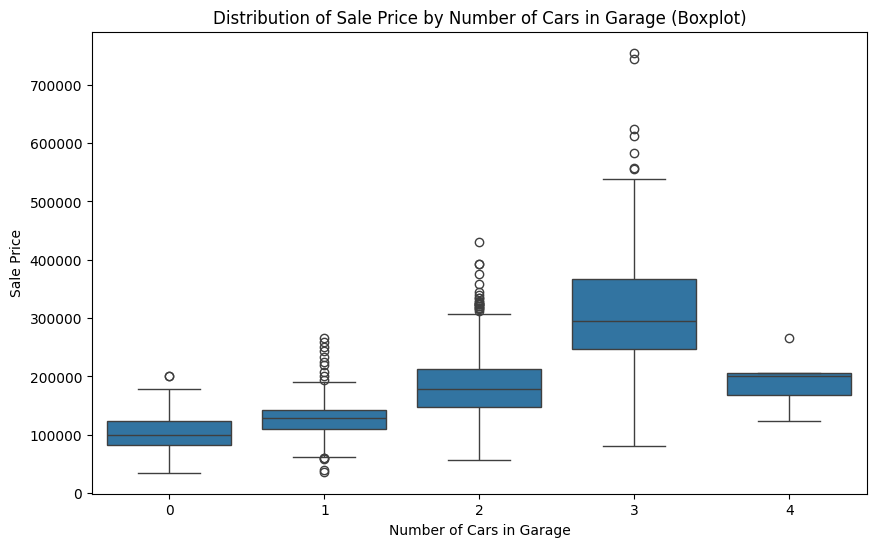

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarajArabaSayısı', y='SatışFiyatı', data=train)
plt.title('Distribution of Sale Price by Number of Cars in Garage (Boxplot)')
plt.xlabel('Number of Cars in Garage')
plt.ylabel('Sale Price')
plt.show()

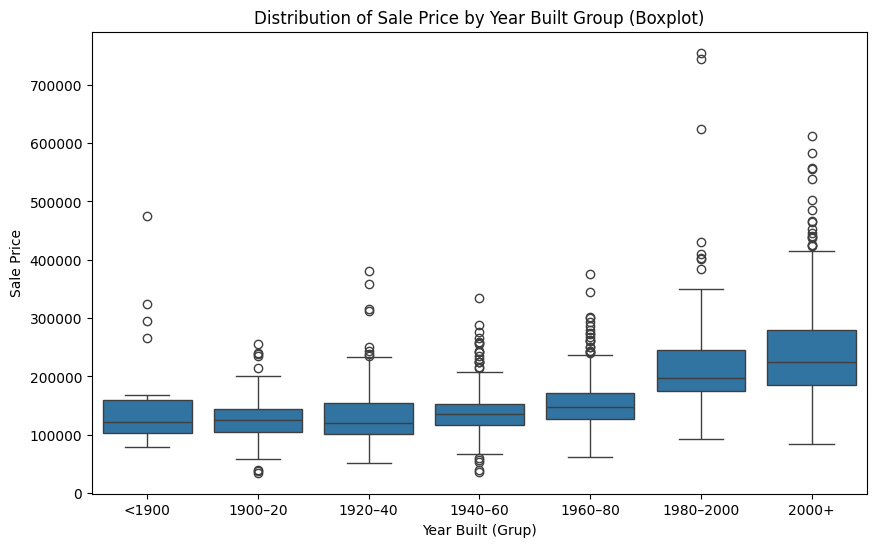

In [37]:
train['YapımYılıBin'] = pd.cut(train['YapımYılı'],
                               bins=[1870, 1900, 1920, 1940, 1960, 1980, 2000, 2020],
                               labels=['<1900', '1900–20', '1920–40', '1940–60', '1960–80', '1980–2000', '2000+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='YapımYılıBin', y='SatışFiyatı', data=train)
plt.title('Distribution of Sale Price by Year Built Group (Boxplot)')
plt.xlabel('Year Built (Grup)')
plt.ylabel('Sale Price')
plt.show()

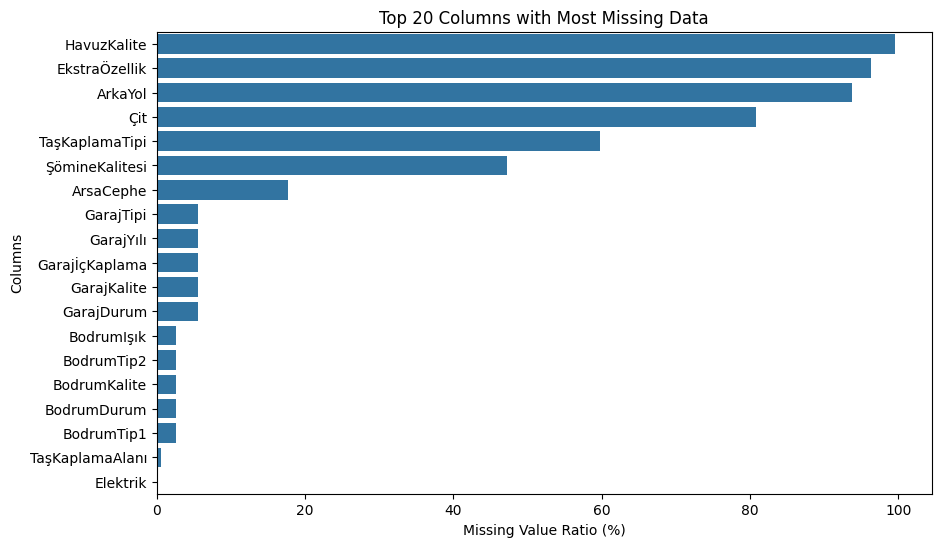

In [41]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing,
    'Eksik Değer Oranı (%)': (missing / len(train)) * 100
})

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df['Eksik Değer Oranı (%)'][:20], y=missing_df.index[:20])
plt.title("Top 20 Columns with Most Missing Data")
plt.xlabel("Missing Value Ratio (%)")
plt.ylabel("Columns")
plt.show()

In [42]:
high_missing_cols = missing_df[missing_df['Eksik Değer Oranı (%)'] >= 40].index

# Sil
train.drop(columns=high_missing_cols, inplace=True)
test.drop(columns=high_missing_cols, inplace=True)

In [43]:
train['ArsaCephe'] = train.groupby('Mahalle')['ArsaCephe'].transform(lambda x: x.fillna(x.median()))
test['ArsaCephe'] = test.groupby('Mahalle')['ArsaCephe'].transform(lambda x: x.fillna(x.median()))

In [44]:
train['ArsaCephe'] = train.groupby('Mahalle')['ArsaCephe'].transform(
    lambda x: x.fillna(x.median())
)

test['ArsaCephe'] = test.groupby('Mahalle')['ArsaCephe'].transform(
    lambda x: x.fillna(x.median())
)

In [45]:
train['ArsaCephe'] = train.groupby('Mahalle')['ArsaCephe'].transform(
    lambda x: x.fillna(x.median())
)

test['ArsaCephe'] = test.groupby('Mahalle')['ArsaCephe'].transform(
    lambda x: x.fillna(x.median())
)

In [46]:
garaj_sütunları = ['GarajTipi', 'GarajİçKaplama', 'GarajKalite', 'GarajDurum']

for sütun in garaj_sütunları:
    train[sütun] = train[sütun].fillna('None')
    test[sütun] = test[sütun].fillna('None')


train['GarajYılı'] = train['GarajYılı'].fillna(0)
test['GarajYılı'] = test['GarajYılı'].fillna(0)

In [47]:
bodrum_sütunları = ['BodrumTip1', 'BodrumTip2', 'BodrumIşık', 'BodrumDurum', 'BodrumKalite']

for sütun in bodrum_sütunları:
    train[sütun] = train[sütun].fillna('None')
    test[sütun] = test[sütun].fillna('None')

In [48]:
train['Elektrik'] = train['Elektrik'].fillna(train['Elektrik'].mode()[0])
test['Elektrik'] = test['Elektrik'].fillna(test['Elektrik'].mode()[0])

In [49]:
print("Total missing values in train:", train.isnull().sum().sum())
print("Total missing values in test:", test.isnull().sum().sum())

Total missing values in train: 8
Total missing values in test: 37


In [50]:
print("Missing columns in Train:")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("\nMissing columns in Test:")
print(test.isnull().sum()[test.isnull().sum() > 0])

Missing columns in Train:
TaşKaplamaAlanı    8
dtype: int64

Missing columns in Test:
İmarDurumu              4
Altyapı                 2
DışKaplama1             1
DışKaplama2             1
TaşKaplamaAlanı        15
BodrumAlan1             1
BodrumAlan2             1
BitmemişBodrumAlanı     1
ToplamBodrumAlanı       1
BodrumTamBanyo          2
BodrumYarımBanyo        2
MutfakKalitesi          1
Fonksiyonel             2
GarajArabaSayısı        1
GarajAlanı              1
SatışTipi               1
dtype: int64


In [51]:
train['TaşKaplamaAlanı'] = train['TaşKaplamaAlanı'].fillna(0)

In [52]:
mode_cols = ['İmarDurumu', 'Altyapı', 'DışKaplama1', 'DışKaplama2', 'MutfakKalitesi', 'Fonksiyonel', 'SatışTipi']
for col in mode_cols:
    test[col] = test[col].fillna(test[col].mode()[0])


test['TaşKaplamaAlanı'] = test['TaşKaplamaAlanı'].fillna(0)


garage_cols = ['GarajArabaSayısı', 'GarajAlanı']
for col in garage_cols:
    test[col] = test[col].fillna(0)

bsmt_cols = ['BodrumAlan1', 'BodrumAlan2', 'BitmemişBodrumAlanı', 'ToplamBodrumAlanı', 'BodrumTamBanyo', 'BodrumYarımBanyo']
for col in bsmt_cols:
    test[col] = test[col].fillna(0)

In [53]:
print("Missing columns in Train:")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("\nMissing columns in Test:")
print(test.isnull().sum()[test.isnull().sum() > 0])

Missing columns in Train:
Series([], dtype: int64)

Missing columns in Test:
Series([], dtype: int64)


In [54]:
train.isnull().sum().sort_values(ascending=False).head()
test.isnull().sum().sort_values(ascending=False).head()

,0
Id,0
BinaSınıfı,0
İmarDurumu,0
ArsaCephe,0
ArsaAlanı,0


In [55]:
def add_features(df):
    df['ToplamAlan'] = df['YaşanabilirAlan'] + df['ToplamBodrumAlanı']
    df['ToplamBanyo'] = df['TamBanyo'] + 0.5 * df['YarımBanyo']
    df['EvYaşı'] = (df['SatışYılı'] - df['YapımYılı']).clip(lower=0)
    df['ToplamDışAlan'] = df['AhşapTerasAlanı'] + df['AçıkVerandaAlanı'] + df['KapalıVerandaAlanı'] + df['ÜçMevsimVerandaAlanı'] + df['SineklikVerandaAlanı'] + df['HavuzAlanı']
    return df

train = add_features(train)
test = add_features(test)

In [56]:
print(train[['ToplamBanyo', 'ToplamAlan', 'EvYaşı', 'ToplamDışAlan']].head())

   ToplamBanyo  ToplamAlan  EvYaşı  ToplamDışAlan
0          2.5        2566       5             61
1          2.0        2524      31            298
2          2.5        2706       7             42
3          1.0        2473      91            307
4          2.5        3343       8            276


In [57]:
train['SatışFiyatı'] = np.log1p(train['SatışFiyatı'])

In [58]:
from scipy.stats import skew


numeric_feats = train.select_dtypes(include=['int64', 'float64']).drop('SatışFiyatı', axis=1)

skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)


high_skew = skewed_feats[skewed_feats > 0.75]
skewed_features = high_skew.index


for feat in skewed_features:
    train[feat] = np.log1p(train[feat])
    test[feat] = np.log1p(test[feat])

In [59]:
print("Transformed columns:\n", skewed_features.tolist())

Transformed columns:
 ['EkstraDeğer', 'HavuzAlanı', 'ArsaAlanı', 'ÜçMevsimVerandaAlanı', 'DüşükKaliteAlan', 'MutfakSayısı', 'BodrumAlan2', 'SineklikVerandaAlanı', 'BodrumYarımBanyo', 'KapalıVerandaAlanı', 'TaşKaplamaAlanı', 'AçıkVerandaAlanı', 'ArsaCephe', 'ToplamAlan', 'BodrumAlan1', 'ToplamDışAlan', 'AhşapTerasAlanı', 'ToplamBodrumAlanı', 'BinaSınıfı', 'BirinciKatAlan', 'YaşanabilirAlan', 'BitmemişBodrumAlanı', 'İkinciKatAlan']


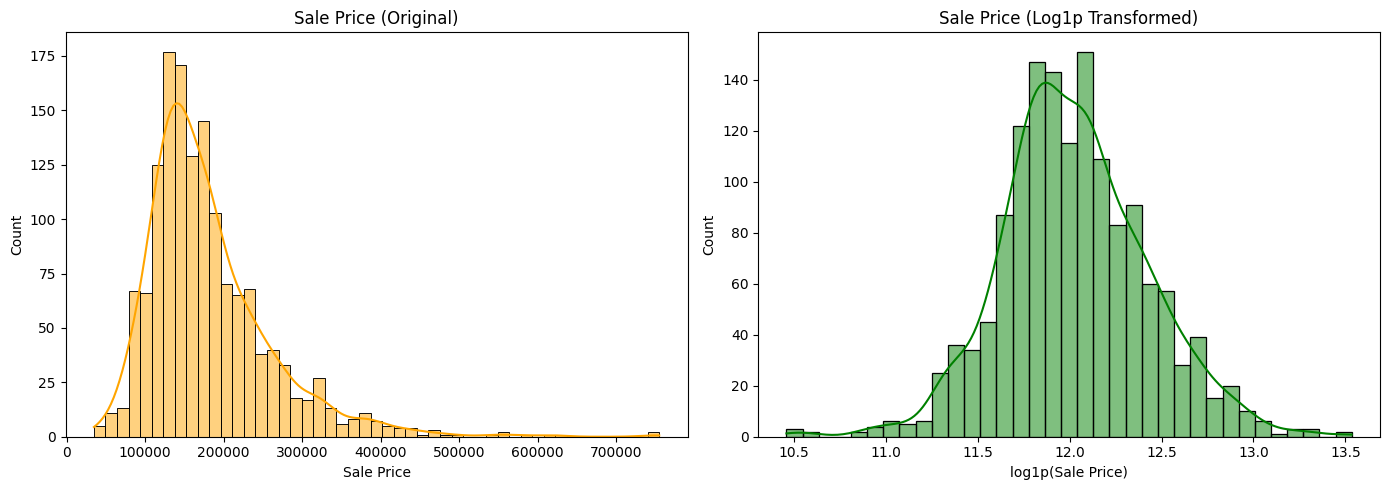

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 1. Orijinal dağılım (log1p'ın tersiyle görselleştir)
sns.histplot(np.expm1(train['SatışFiyatı']), kde=True, ax=ax[0], color="orange")
ax[0].set_title("Sale Price (Original)")
ax[0].set_xlabel("Sale Price")

# 2. Log dönüşümlü dağılım
sns.histplot(train['SatışFiyatı'], kde=True, ax=ax[1], color="green")
ax[1].set_title("Sale Price (Log1p Transformed)")
ax[1].set_xlabel("log1p(Sale Price)")

plt.tight_layout()
plt.show()

In [61]:
loglu_skew = skew(train['SatışFiyatı'])
print(f"Log-transformed Skewness: {loglu_skew:.4f}")

Log-transformed Skewness: 0.1212


In [62]:
y = train['SatışFiyatı']
train = train.drop('SatışFiyatı', axis=1)


all_data = pd.concat([train, test], keys=['train', 'test'])


all_data_encoded = pd.get_dummies(all_data)


train_encoded = all_data_encoded.loc['train']
test_encoded = all_data_encoded.loc['test']

In [63]:
print("Train shape:", train_encoded.shape)
print("Test shape:", test_encoded.shape)

Train shape: (1460, 287)
Test shape: (1459, 287)


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X = scaler.fit_transform(train_encoded)
X_test = scaler.transform(test_encoded)

In [66]:
print("X shape:", X.shape)
print("X_test shape:", X_test.shape)

X shape: (1460, 287)
X_test shape: (1459, 287)


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

`X_train, X_test, y_train, y_test = train_test_split(train_encoded,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)



models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)

    rmse = np.sqrt(mean_squared_error(y_real, y_pred_real))
    print(f"{name} RMSE: {rmse:.2f}")

Linear Regression RMSE: 23151.71
Ridge RMSE: 23107.51
Lasso RMSE: 24916.55
Random Forest RMSE: 28218.84


In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
rmse_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Test RMSE:", rmse_test)

Test RMSE: 0.12452561127641074


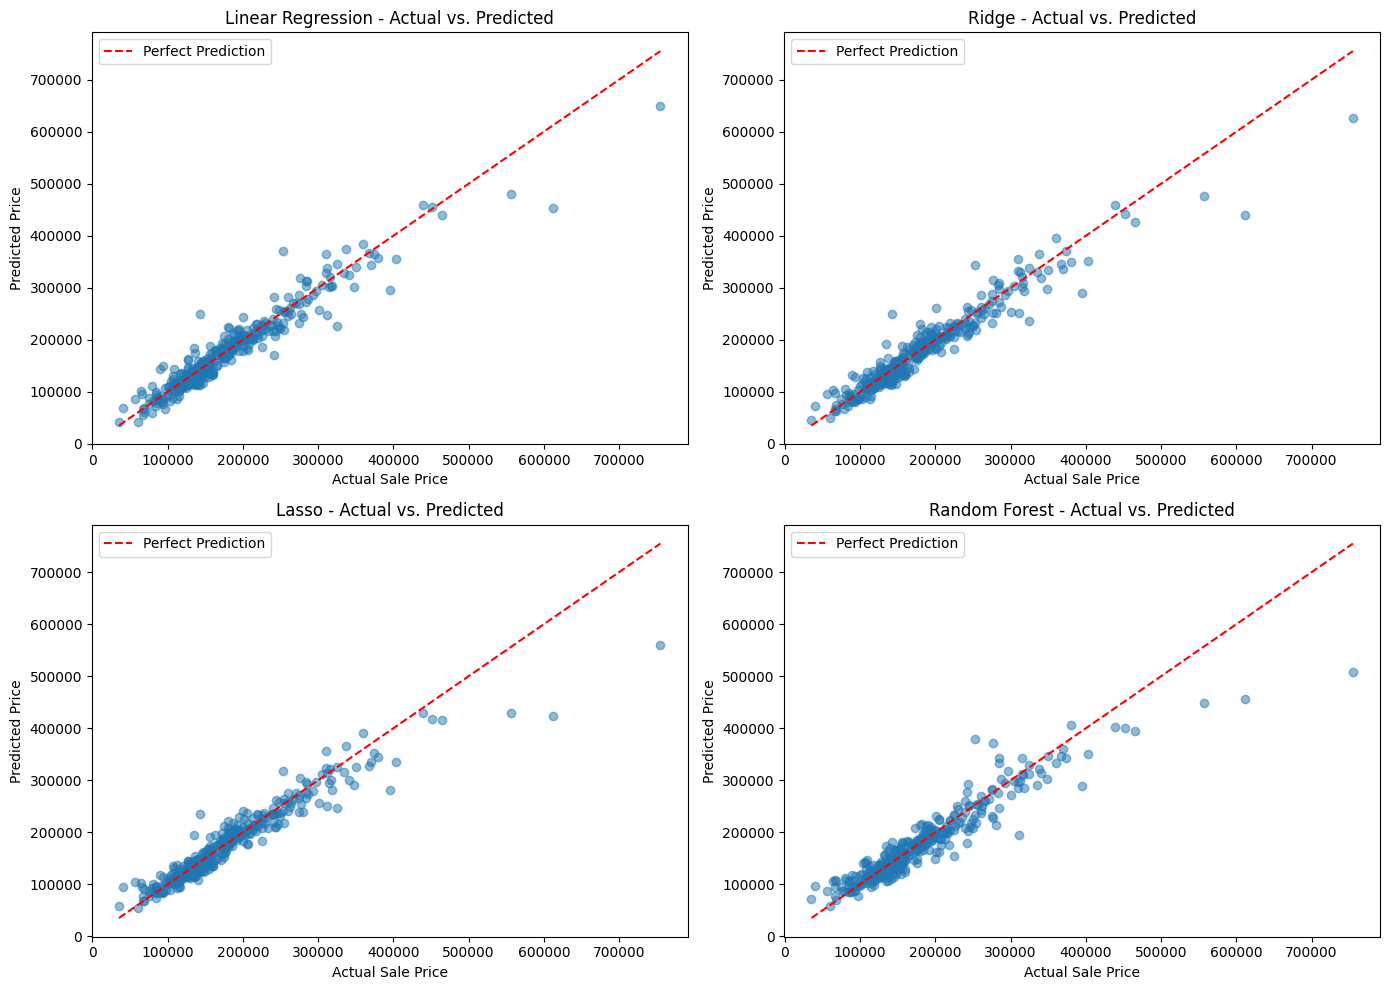

In [70]:
import matplotlib.pyplot as plt

# Plot ayarları
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Her model için ayrı grafik çiz
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Log dönüşüm varsa tersine çevir
    y_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)

    # Scatter plot
    axes[i].scatter(y_real, y_pred_real, alpha=0.5)
    axes[i].plot([y_real.min(), y_real.max()],
                 [y_real.min(), y_real.max()],
               'r--', label="Perfect Prediction")
    axes[i].set_title(f"{name} - Actual vs. Predicted")
    axes[i].set_xlabel("Actual Sale Price")
    axes[i].set_ylabel("Predicted Price")
    axes[i].legend()

plt.tight_layout()
plt.show()

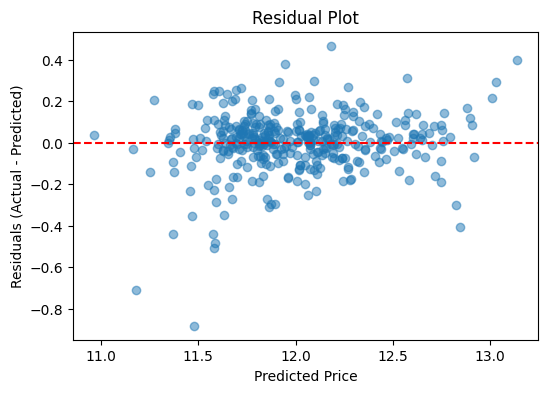

In [71]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")

plt.show()